# Customer Types and Rental Methods  Ford GoBike System
## by Jiaqi Huang

## Investigation Overview

> After drop nulls, there are 317843 bike rides in Feb 2020 dataset with 8 features(duration,start&end time,start&end station,start&end latitude,start&end longitude,bike id,user type and rental_access_method)

## Dataset Overview

> There are 317843 bike rides in Feb 2020 dataset with 8 features(duration,start&end time,start&end station,start&end latitude,start&end longitude,bike id,user type and rental_access_method), 114511 data points have been removed, because those data do not have info on our interested feature: rental methods

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('202002-baywheels-tripdata.csv')

In [10]:
#drop the null of rental_access_method
df = df.dropna(subset=["rental_access_method"])

In [11]:
#extract hour from the datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['hour'] = df.start_time.dt.hour

## Distribution of Duration in seconds

> The distribution looks like normal distribution ; it can be seen that th most common duration is about 300 to 1000 secs, which about 5mins to 16.67 mins.

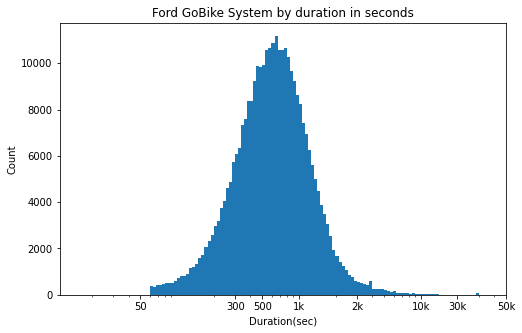

In [12]:
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50,300,500,1000,3000,10000,20000,50000], ['50', '300', '500', '1k', '2k', '10k','30k','50k'])
plt.xlabel('Duration(sec)')
plt.ylabel('Count')
plt.title('Ford GoBike System by duration in seconds')
plt.show()

## Customers and Subscribers by duration_sec

> <p>Producing the bar chart to see differences on average duration_sec for each type users. 
  <p>Observation: Customers have longer duration than Subscriber on average

<BarContainer object of 2 artists>

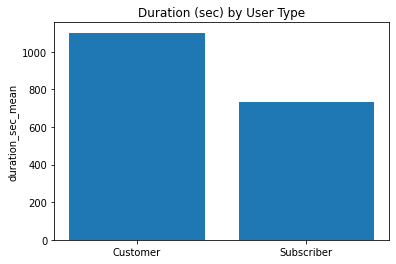

In [13]:
df_customer_sec = df.query('user_type == "Customer"')
customer_sec = df_customer_sec['duration_sec'].mean()
df_subscriber_sec = df.query('user_type == "Subscriber"')
subscriber_sec = df_subscriber_sec['duration_sec'].mean()
locations = [1,2]
heights = [customer_sec,subscriber_sec]
labels =['Customer','Subscriber']
plt.ylabel('duration_sec_mean')
plt.title('Duration (sec) by User Type')
plt.bar(locations,heights,tick_label = labels)

<p>Producing a violin plot to see the distributions.
<p>Observation:The distrbution for customer is a little bit more peaked. Both Customers and Subscribers have some outliners. For travel duration below 1000 secs,there are more subscribers than customers,however,for travel duration between 1000 to 2000 secs, there are more customers than subscribers.

Text(0.5, 1.0, 'Duration (sec) by User Type')

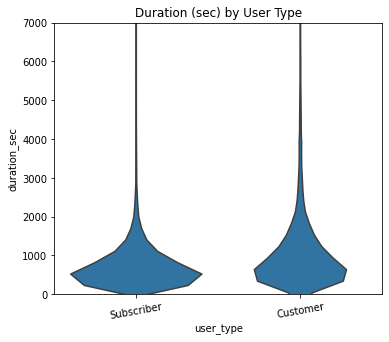

In [14]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'user_type', y = 'duration_sec', inner = None,
              color = base_color)
plt.ylim(0,7000)
plt.xticks(rotation = 10) 
plt.title('Duration (sec) by User Type')

## User_type and Rental methods by duration_sec Average
<p>Producing the plots with color grade to show differences of duration_sec average for user_type with different rental access methods.There are two observations:
<p>Customers who use App have highest duration_avg.
<p>Subscribers who use clipper have lowest duration_avg.


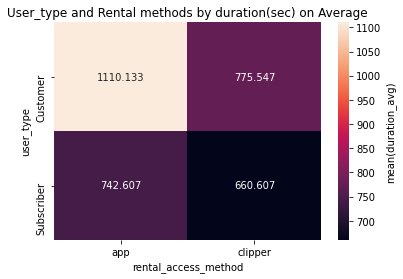

In [15]:
cat_means = df.groupby(['user_type', 'rental_access_method']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'rental_access_method',
                            values = 'duration_avg')
plt.title('User_type and Rental methods by duration(sec) on Average')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_avg)'})